In [3]:
import pandas as pd

filename = "WA_Fn-UseC_-Telco-Customer-Churn.train.csv"
telco_data = pd.read_csv(filename)

# Prima Analisi dei dati
In questa sezione si farà una prima ispezione dei dati, in modo tale da capire come pulire al meglio i dati successivamente

In [4]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [5]:
# descrizione dei dati categorici
telco_object_data = telco_data.select_dtypes(exclude=['number'])
telco_object_data.describe()

,Churn,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5300
top,No,8197-BFWVU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,4138,1,2887,2904,3951,5082,2685,2481,2810,2448,2489,2791,2239,2223,3083,3325,1887,10


In [6]:
# descrizione dei dati numerici
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


Stranamente `TotalCharges` non viene indicato come numerico...

In [7]:
telco_data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


Probabilmente il campo `customerID` non serve per allenare il modello. Quindi lo si può spostare come indice

In [8]:
telco_data.index = telco_data['customerID']
telco_data = telco_data.drop(labels=['customerID'], axis=1)
telco_data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,No,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
6035-RIIOM,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
3797-VTIDR,Yes,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
2568-BRGYX,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [9]:
import seaborn as sns

Sembra che all'aumentare del valore di `tenure` il cliente accetti anche addebiti mensili più alti rispetto a chi ha mollato la compagnia con la stessa tariffa

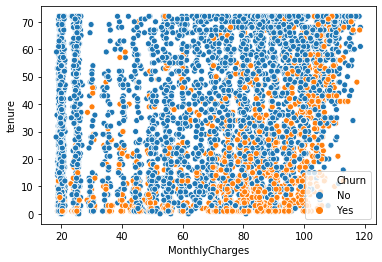

In [10]:
sns.scatterplot(x="MonthlyCharges", y="tenure", hue="Churn",

                     data=telco_data)
# tenure indica da quanto tempo il cliente è fornito dalla compagnia (?)

In [11]:
total_charges_numeric = pd.to_numeric(telco_data["TotalCharges"], errors='coerce')
print("Number of missing total charges: ", total_charges_numeric.isna().sum())

Number of missing total charges:  10


Si fa una conversione di formato per il campo `TotalCharges` in modo tale da rappresentare correttamente anche i valori `NaN`. Informazione che era "nascosta" per via del tipo stringa precedentemente utilizzato

In [12]:
telco_data_raw = telco_data
telco_data_raw["TotalCharges"] = total_charges_numeric
telco_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4223-BKEOR to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null 

# Creazione degli insiemi di train e di test

In [13]:
from sklearn.model_selection import train_test_split

X = telco_data_raw.drop(labels=['Churn'], axis=1)
y = telco_data_raw.Churn
y = y.map({"Yes": 1, "No": 0}) #non servono encoder particolari, quindi applico direttamente la conversione
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

# Pulizia dei dati

A questo punto occorre trasformare tutti i valori categorici in valori numerici e i valori nulli si possono riempire facendo una stima

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
telco_object_data = X.select_dtypes(exclude=['number'])
categorical_cols = telco_object_data.columns
numerical_cols = X.select_dtypes(include=['number']).columns

print("There are", len(categorical_cols), "categorical columns", end=" ")
print("\nThose columns are", categorical_cols, end=" ")
print("\n")
print("\nThere are", len(numerical_cols), "numerical columns", end=" ")
print("\nThose columns are", numerical_cols, end=" ")



There are 15 categorical columns 
Those columns are Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object') 


There are 4 numerical columns 
Those columns are Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object') 

In [16]:
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

for col in categorical_cols:
    X_train_clean[col] = encoder.fit_transform(X_train_clean[col])
    X_test_clean[col] = encoder.transform(X_test_clean[col])
 


from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

#train
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_clean))
X_train_imputed.columns = X_train_clean.columns
X_train_imputed.index = X_train_clean.index

#test
X_test_imputed = pd.DataFrame(imputer.transform(X_test_clean))
X_test_imputed.columns = X_test_clean.columns
X_test_imputed.index = X_test_clean.index

X_train_clean = X_train_imputed
X_test_clean = X_test_imputed

X_train_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
1374-DMZUI,0.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,94.30,424.45
4942-VZZOM,1.0,0.0,1.0,0.0,64.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,66.15,4392.50
6169-PGNCD,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,74.30,4166.35
2604-XVDAM,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.80,540.95
5961-VUSRV,0.0,0.0,0.0,0.0,12.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,19.35,219.35


# Training del modello

In questa sezione si effettua il training tramite cross-validation. Inoltre si definiscono le ennuple per fare i vari eseprimenti in modo tale da valutare quali parametri si comportano meglio. Infatti si effettua il prodotto cartesiano tra le quattro liste di parametri per ottenere una tabella contenente tutte le possibili combinazioni dei parametri principali che si possono applicare al`DecisionTreeClassifier.`

Inoltre si è scelto di usare il`DecisionTreeClassifier`in modo tale da avere un modello che si potesse allenare in poco tempo rispetto ad altre alternative. Questo perché l'insieme di iterazioni che si dovranno fare per la cross-validation è *particolarmente* grande.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

depths = [3,4,5,10, None]
criterions = ['gini', 'entropy']
min_samples = [1, 5, 20, 50, 100]
max_nodes = [20, 50, 100, 300, None]

from itertools import product
parameters = product(depths, criterions, min_samples, max_nodes)

scores = []
for parameter in parameters:
    depth, criterion, min_sample, max_node = parameter
    model = DecisionTreeClassifier(criterion=criterion, max_depth = depth, min_samples_leaf = min_sample, max_leaf_nodes = max_node, random_state=33)
    scores.append( [depth, criterion, min_sample, max_node, cross_val_score(estimator=model, X=X_train_clean, y=y_train, cv=5, n_jobs=4).mean()] )


# Analisi parametri
Si conlcude l'analsi del modello, scegliendo quali parametri tendono a massimizzare il valore di score

In [18]:
import numpy as np

scores_data = pd.DataFrame(scores, 
                           columns=['max_depth', 'criterion', 'min_samples_leaf', 'max_leaf_nodes', 'score'],
                          )
scores_data = scores_data.fillna(value=np.inf) # il valore None intendeva un valore senza limiti, quindi sostituisco con infinito il valore NaN
scores_data

,max_depth,criterion,min_samples_leaf,max_leaf_nodes,score
0,3.0,gini,1,20.0,0.773021
1,3.0,gini,1,50.0,0.773021
2,3.0,gini,1,100.0,0.773021
3,3.0,gini,1,300.0,0.773021
4,3.0,gini,1,inf,0.773021
...,...,...,...,...,...
245,inf,entropy,100,20.0,0.790548
246,inf,entropy,100,50.0,0.791880
247,inf,entropy,100,100.0,0.791880
248,inf,entropy,100,300.0,0.791880


Si individua un massimo in`max_depth`= 5

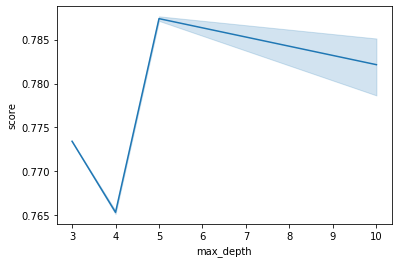

In [19]:
sns.lineplot(x="max_depth", y="score", data=scores_data)

Il criterio migliore sembra `gini`, anche se la differenza è minima.

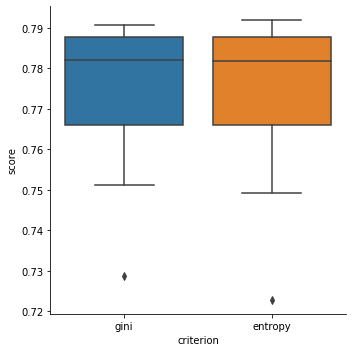

In [20]:
sns.catplot(x="criterion", y="score", kind="box", data=scores_data);

La funzione sembra crescente all'aumentare di `min_samples_leaf'

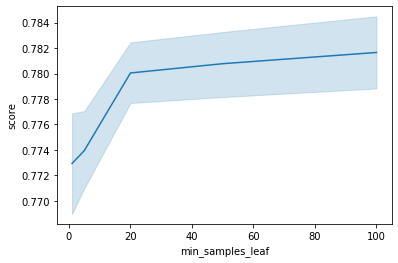

In [21]:
sns.lineplot(x="min_samples_leaf", y="score", data=scores_data)

La funzione sembra decrescere in base al valore di `max_leaf_nodes`

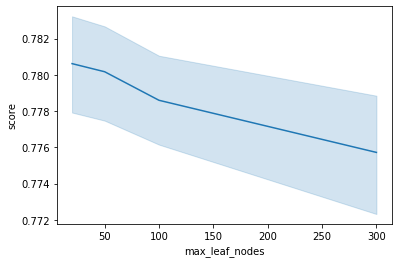

In [22]:
sns.lineplot(x="max_leaf_nodes", y="score", data=scores_data)


Dall'analisi dei parametri si intuisce che il miglior modello sarà definito dalle seguenti scelte

In [23]:
final_model = DecisionTreeClassifier(
                    criterion='gini', 
                    max_depth = 5, 
                    min_samples_leaf = 100, 
                    max_leaf_nodes = 20, 
                    random_state=33
              )
final_model.fit(X_train_clean, y_train)
final_model.score(X_test_clean, y_test)

0.7905944986690329

# Conclusioni
In questa sezione si vuole analizzare dal punto di vista grafico i risultati del modello finale

[Text(2319.128787878788, 3460.4166666666665, 'Contract <= 0.5\ngini = 0.393\nsamples = 4507\nvalue = [3298, 1209]\nclass = No'),
 Text(1526.5151515151515, 2831.25, 'OnlineSecurity <= 0.5\ngini = 0.49\nsamples = 2494\nvalue = [1425, 1069]\nclass = No'),
 Text(939.3939393939394, 2202.0833333333335, 'tenure <= 12.5\ngini = 0.5\nsamples = 1712\nvalue = [840, 872]\nclass = Yes'),
 Text(469.6969696969697, 1572.916666666667, 'InternetService <= 0.5\ngini = 0.467\nsamples = 898\nvalue = [334, 564]\nclass = Yes'),
 Text(234.84848484848484, 943.75, 'TotalCharges <= 103.225\ngini = 0.499\nsamples = 345\nvalue = [178, 167]\nclass = No'),
 Text(117.42424242424242, 314.5833333333335, 'gini = 0.474\nsamples = 158\nvalue = [61, 97]\nclass = Yes'),
 Text(352.27272727272725, 314.5833333333335, 'gini = 0.468\nsamples = 187\nvalue = [117, 70]\nclass = No'),
 Text(704.5454545454545, 943.75, 'TotalCharges <= 120.0\ngini = 0.405\nsamples = 553\nvalue = [156, 397]\nclass = Yes'),
 Text(587.1212121212121, 314.

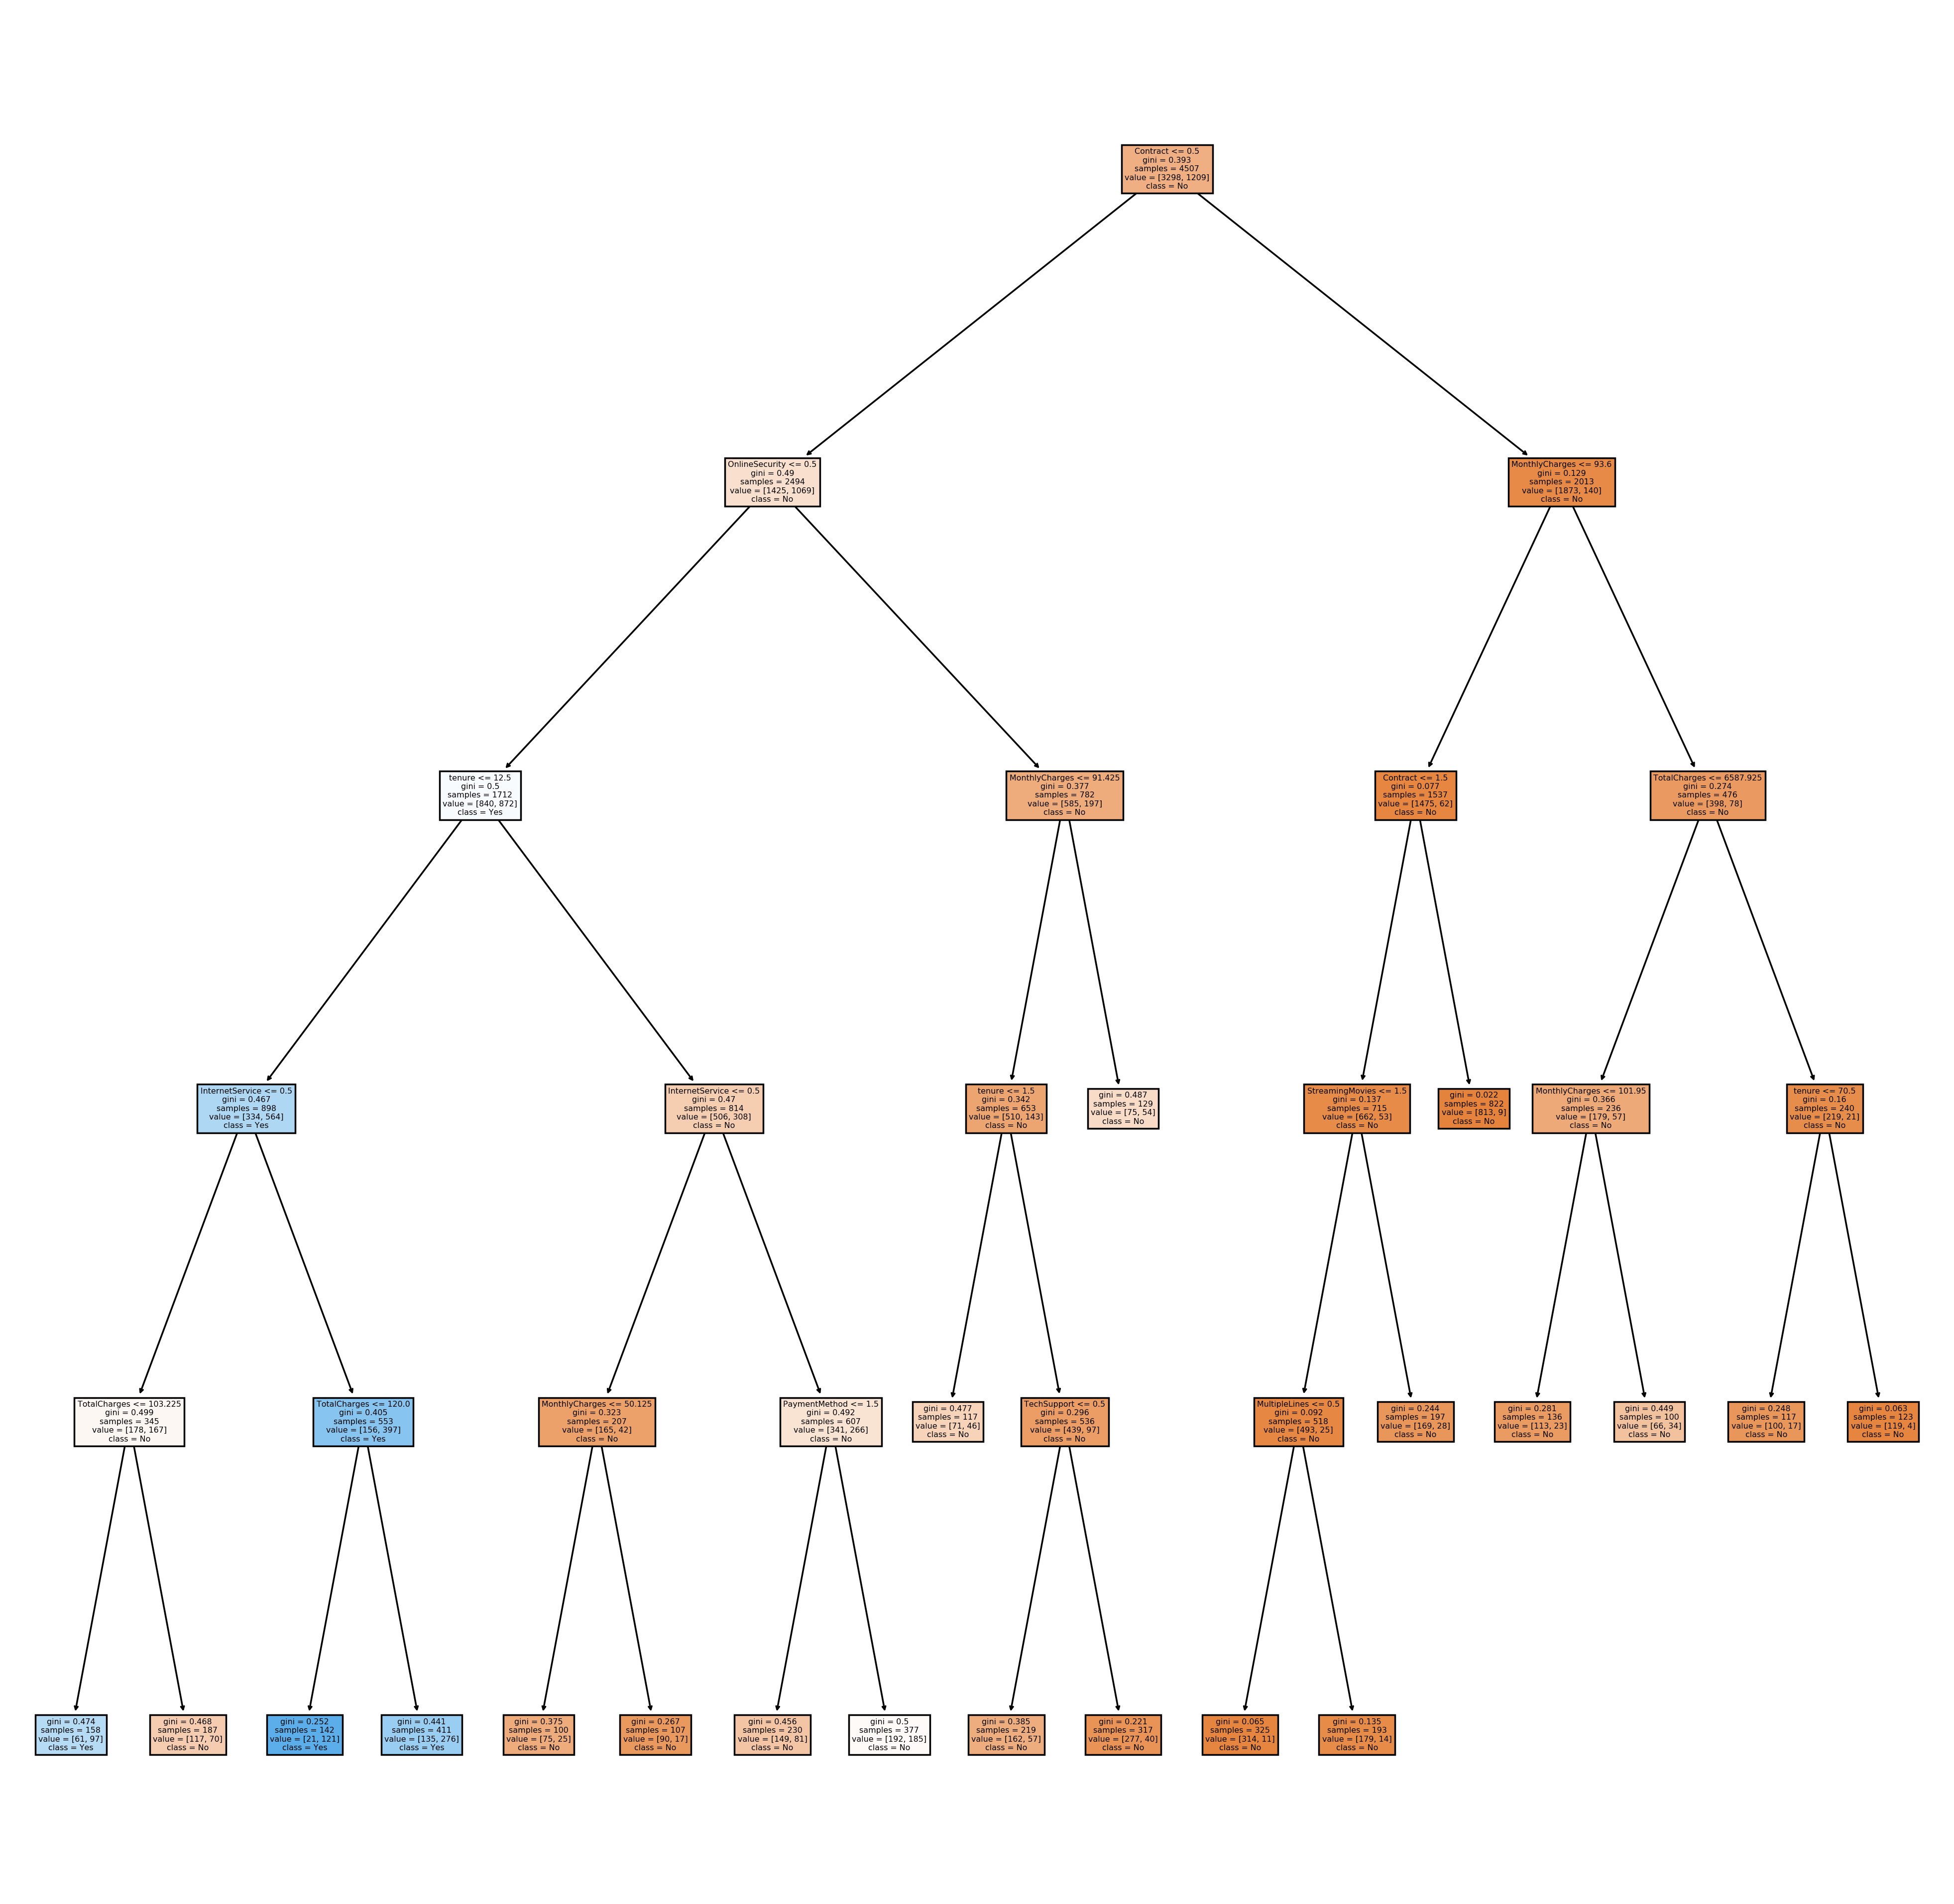

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (20,20), dpi=250)
tree.plot_tree(final_model, feature_names=X_train_clean.columns, filled=True, class_names = ['No', 'Yes'])

L'albero in uscita sfrutta la profondità massima concessa e inoltre è bilanciato. Per questo il numero dei nodi è abbastanza grande. Un analisi nel dettaglio richiederebbe parecchio tempo. Ma già da un analisi superficiale si nota che il parametro`Contract` è una delle feature fondamentali. Inoltre si nota che ogni volta che ha diviso i nodi con la feature`tenure`, il nodo figlio che manteneva i valori più alti presentava un maggior numero di elementi classificati come *No Churn*.

Invece una foglia particolare che viene usata come *Yes Churn* la si può individuare seguendo il cammino:
- Contract <= 0.5 ovvero con contratto di un anno
- OnlineSecurity <= 0.5 ovvero con sicurezza online
- Tenure <= 12.5
- InternetService <= 0.5
- TotalCharges <= 120